# MA 116 B1 Simple Linear Regression Demo


Let's apply the `minimize` function from `scipy.optimize` to find the line that minimizes the sum of square residuals for a given sample X, Y.

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 3, 5, 4, 6])


# Define the objective function to minimize (sum of squared residuals)
def sum_of_squares(twoparams):
    s, t = twoparams
    y_pred = s * X + t
    residuals = Y - y_pred
    return np.sum(residuals**2)


def least_squares_regression(x, y):
    """
    Calculate the least squares regression line by minimizing the sum of squared residuals.
    
    Parameters:
    x (array-like): Independent variable values
    y (array-like): Dependent variable values
    
    Returns:
    tuple: (s, t) of the regression line
    """
    
    # Initial guess for slope and intercept
    initial_guess = np.array([1.0, 0.1])
    
    # Minimize the sum of squares
    result = minimize(sum_of_squares, initial_guess) #method='Nelder-Mead'
    
    if result.success:
        slope, intercept = result.x
        return slope, intercept
    else:
        raise ValueError("Optimization failed: " + result.message)

Apply the `least_squares_regression` function we just defined to our sample X, Y.

In [89]:
b1, b0 = least_squares_regression(X, Y)
print("The least squares regression line of this sample is y= {:.3f} x + {:.3f}".format(b1, b0)) # numerical solution

The least squares regression line of this sample is y= 0.900 x + 1.300


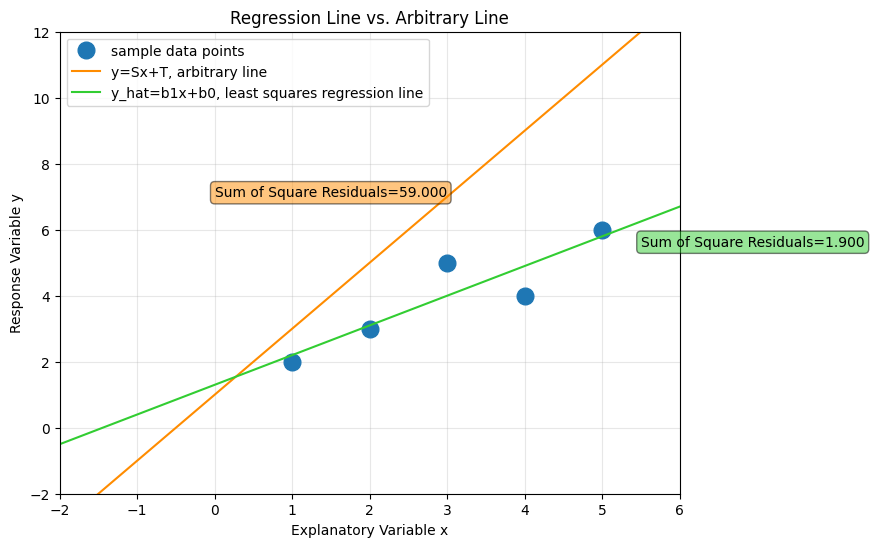

In [93]:
# Create the plot of sample data points
plt.figure(figsize=(8, 6))
plt.xlim(-2, 6)    
plt.ylim(-2, 12)
plt.plot(X, Y, marker='o', linestyle='', markersize=12, label='sample data points')

# Create the plots of an arbitrary line f=Sx+T and the least squares regression line y_hat=b1*x+b0
S = 2 # Try to adjust S and T value to get another line!
T = 1 
x = np.linspace(-2, 6, 100)
f = S * x + T
plt.plot(x, f, color='darkorange', marker='', linestyle='-', markersize=1, label='y=Sx+T, arbitrary line')
y_hat = b1 * x + b0
plt.plot(x, y_hat, color='limegreen', marker='', linestyle='-', markersize=1, label='y_hat=b1x+b0, least squares regression line')

# Compare sum of square residuals
f_sosr     = sum_of_squares([S, T])      # sum of square residuals of the arbitrary line f=sx+t
y_hat_sosr = sum_of_squares([b1, b0])    # sum of square residuals of the least squares regression line y_hat=b1*x+b0

# Create labels of the sums of square residuals
plt.text(5.5, 5.5, 'Sum of Square Residuals={:.3f}'.format(y_hat_sosr), 
         fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="limegreen", alpha=0.5))
plt.text(0, 7, 'Sum of Square Residuals={:.3f}'.format(f_sosr), 
         fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="darkorange", alpha=0.5))

# Add labels and title
plt.xlabel('Explanatory Variable x')
plt.ylabel('Response Variable y')
plt.title('Regression Line vs. Arbitrary Line')

# Add grid
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Show the plot
plt.show()

Let's compare the least squares regression line obtained from the scipy.optimize minimize function to the least squares regression line calculated using our formulas for b1 and b0. $$r=\dfrac{\sum_i \left( \dfrac{(x_i-\overline{x})}{s_x} \dfrac{(y_i-\overline{y})}{s_y}\right)}{n-1}=\dfrac{\sum_i (x_i-\overline{x})(y_i-\overline{y})}{s_xs_y(n-1)}.$$
$$b_1=r \dfrac{s_y}{s_x},\; b_0=\overline{y}-b_1\overline{x}.$$  

In [94]:
# Compare with simple linear regression formulas for verification
x_bar = np.mean(X)
y_bar = np.mean(Y)
s_x   = np.std(X, ddof=1) # ddof=1 represents sample standard deviation
s_y   = np.std(Y, ddof=1)
n     = np.size(X)

r  = np.sum( (X-x_bar) @ (Y-y_bar) ) / (s_x * s_y * (n-1) )
b1 = r * s_y / s_x
b0 = y_bar - b1 * x_bar
print("The linear correlation coefficient is r={:.3f}.".format(r))
print("Formula solution: y = {:.3f}x + {:.3f}".format(b1, b0)) # formula solution

The linear correlation coefficient is r=0.900.
Formula solution: y = 0.900x + 1.300


## Optional Content
Let's compare the least square regression line we get from `minimize` function and from using $b_0,\,b_1$ formulas to `numpy`'s built-in least square regression line.

In [92]:
# Compare with numpy's built-in least squares for verification, some linear algebra techniques
A = np.vstack([X, np.ones(len(X))]).T
m_np, c_np = np.linalg.lstsq(A, Y, rcond=None)[0]
print("Numpy verification: y = {:.3f}x + {:.3f}".format(m_np, c_np)) # analytical solution

Numpy verification: y = 0.900x + 1.300
